In [ ]:
# Mount Drive for remote data access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Install packages**

# **Import packages**

In [ ]:
import random
from math import *

import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

import os



# **Import data**

In [ ]:
path_names = { 'RecSys 2015 raw dat file': "/content/drive/MyDrive/Seminar QM/Data/RecSys2015-RAW.dat",
    'pretrain_data': "/content/drive/MyDrive/Seminar QM/Data/RecSys2015data_pretraining.txt",
    'train_data':"/content/drive/MyDrive/Seminar QM/Data/RecSys2015data_train.txt",
    'test_cleaned_data' : "/content/drive/MyDrive/Seminar QM/Data/RecSys2015data_test.txt",
    'test_uncleaned_data' : "/content/drive/MyDrive/Seminar QM/Data/RecSys2015data_test_UNCLEANED.txt"
}

In [ ]:
data = pd.read_csv(path_names['RecSys 2015 raw dat file'], 
                 sep=",", #separator whitespace
                 index_col=False,
                 names = ['SessionID', 'Timestamp', 'ItemID', 'Category']) 
data.drop('Timestamp', inplace=True, axis=1)
data.drop('Category', inplace=True, axis=1)

Concatenating data into basket strings

In [ ]:
sessionID = 1
basket = ''
baskets = []

product_cnt = {}

for index, row in tqdm(data.iterrows(),total = data.shape[0]):
  if row['SessionID'] == sessionID:
    basket = ' '.join([basket,str(row['ItemID'])])
  else:
    #only append if more than one item
    if len(basket.split()) > 1:
      baskets.append(basket)

      items = basket.split()           
      for item in items:
        if item not in product_cnt:
          product_cnt[item] = 1
        else:
          product_cnt[item] += 1

    #always move to next basket
    basket = str(row['ItemID'])
    sessionID = row['SessionID']

baskets[0] = baskets[0][1:]
print(f"We have {len(baskets)} baskets.")

Cleaning

In [ ]:
frec_cnt = 0
del_items = []

for k,v in product_cnt.items():
  if v>10:
    frec_cnt+=1
  else:
    del_items.append(k)
print(frec_cnt)
print(len(del_items))
print(len(product_cnt.keys()))

In [ ]:
baskets_cln = []
basket_sizes = []
for basket in tqdm(baskets):
  items = basket.split()
  for delete in del_items:
    if delete in items:
      items.remove(str(delete))
  
  baskets_cln.append(' '.join(items))
  basket_sizes.append(len(items))

Saving data

In [ ]:
random.seed(123)
random.shuffle(baskets) 

#Make pre-train-(3.750.000), train- (100.000) and test split (25.000)
baskets_pretrain = baskets_cln[0:3749999]
baskets_train = baskets_cln[3750000:3849999]
baskets_test = baskets_cln[3850000:3874999]

txt_file = open(path_names['pretrain_data'], "w")
for element in baskets_pretrain:
    txt_file.write(element + "\n")
txt_file.close()

txt_file = open(path_names['train_data'], "w")
for element in baskets_train:
    txt_file.write(element + "\n")
txt_file.close()

txt_file = open(path_names['test_uncleaned_data'], "w")
for element in baskets_test:
    txt_file.write(element + "\n")
txt_file.close()

In [ ]:
#creating an uncleaned test set

random.seed(123)        #shuffle with same seed as when we made train& val sets to avoid doubles
random.shuffle(baskets) 

baskets_test_uncleaned = baskets[-25000:] #take the last 25.000 since we're sure those aren't in train or val set

txt_file = open(path_names['test_uncleaned_data'], "w")
for element in baskets_test_uncleaned:
    txt_file.write(element + "\n")
txt_file.close()


In [ ]:
from inspect import isroutine
#Counting baskets lengths and item frequencies
with open(path_names['pretrain_data']) as file:
  pretrain_data = file.read().splitlines() 

with open(path_names['train_data']) as file:
  train_data = file.read().splitlines() 

with open(path_names['test_uncleaned_data']) as file:
  test_data = file.read().splitlines() 

item_count = {}
basket_sizes = []

for basket in [*pretrain_data, *train_data]:
  items = basket.split()
  basket_sizes.append(len(items))

  for item in items:
    if item in item_count.keys():
      item_count[item] += 1
    else:
      item_count[item] = 1

item_count_frequencies = item_count.values()

for basket in test_data:
  basket_sizes.append(len(basket.split()))

No handles with labels found to put in legend.


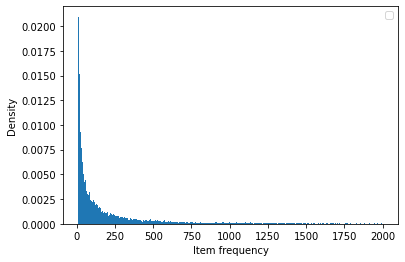

In [ ]:
#histogram of product IDs in basket
plt.hist(item_count_frequencies, bins = 500, range = (10,2000), density=True)
plt.xlabel("Item frequency")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


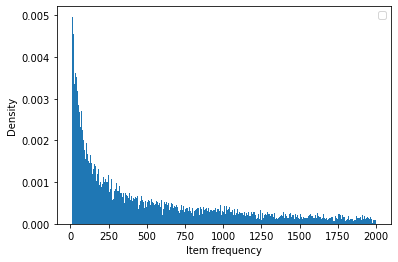

In [ ]:
plt.hist(item_count_frequencies_ah, bins = 500, range = (10,2000), density=True)
plt.xlabel("Item frequency")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.show()

In [ ]:
from inspect import isroutine
#Counting baskets lengths and item frequencies
with open(path_names['pretrain_data']) as file:
  pretrain_data_ah = file.read().splitlines() 

with open(path_names['train_data']) as file:
  train_data_ah = file.read().splitlines() 

item_count_ah = {}
basket_sizes_ah = []

for basket in [*pretrain_data_ah, *train_data_ah]:
  items_ah = basket.split()
  basket_sizes_ah.append(len(items_ah))

  for item in items_ah:
    if item in item_count_ah.keys():
      item_count_ah[item] += 1
    else:
      item_count_ah[item] = 1

item_count_frequencies_ah = item_count_ah.values()

In [ ]:
counter=0
for key, value in item_count_ah.items():
  if value<10:
    counter+=1
print(counter)

386
